 len of X_paa  100
 len of X  48



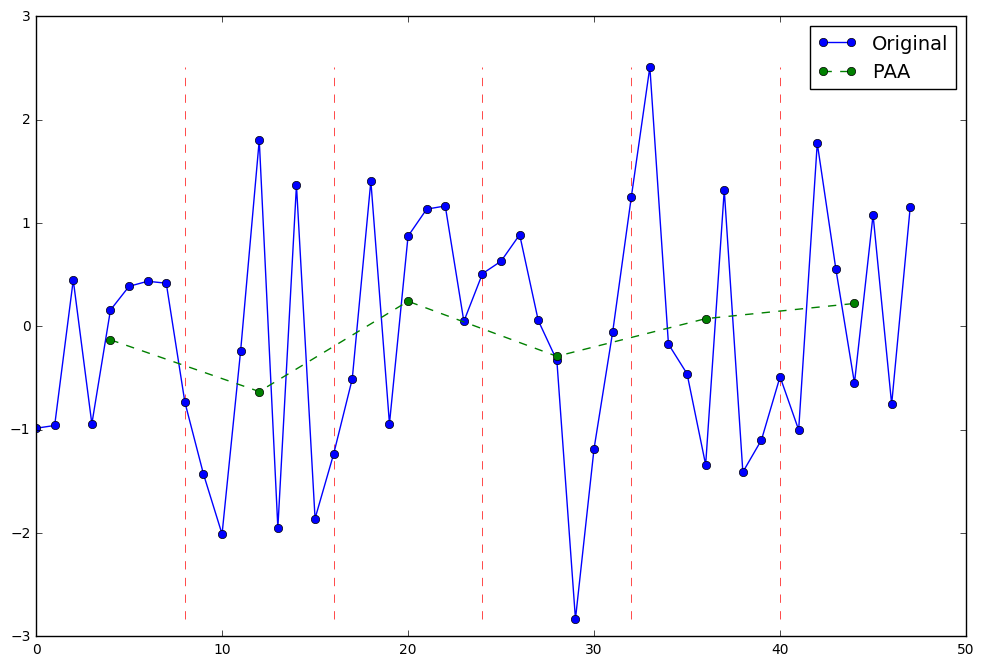

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.approximation import PAA

# Parameters
n_samples, n_features = 100, 48

# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_features)
# print(X)
# print(len(X[0]))

# PAA transformation
window_size = 8
paa = PAA(window_size=window_size)
X_paa = paa.transform(X)
print(" len of X_paa ",len(X_paa))
print(" len of X ",len(X[0]))
print()

# Show the results for the first time series
plt.figure(figsize=(12, 8))
plt.plot(np.arange(n_features), X[1], 'o-', label='Original')
plt.plot(np.arange(window_size // 2,
                   n_features + window_size // 2,
                   window_size), X_paa[1], 'o--', label='PAA')
plt.vlines(np.arange(0, n_features, window_size),
           X[1].min(), X[1].max(), color='r', linestyles='--', linewidth=0.5)
plt.legend(loc='best', fontsize=14)
plt.show()

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import norm
from pyts.quantization import SAX

<bound method BaseEstimator.get_params of SAX(n_bins=3, quantiles='empirical')>


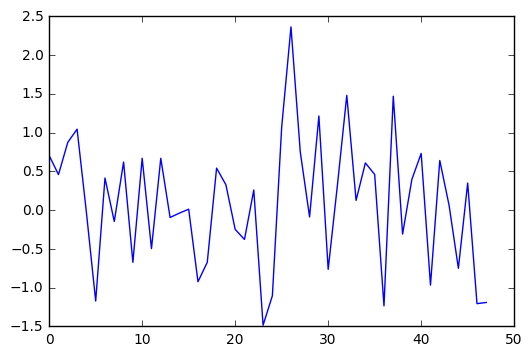

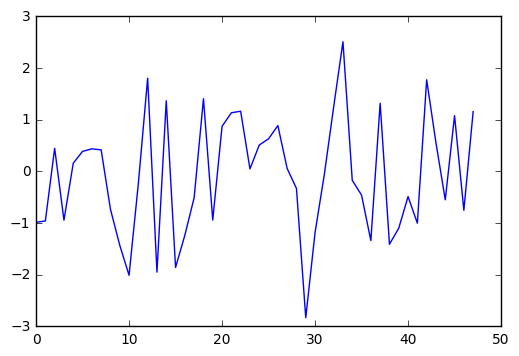

[ 0.26970654  0.0842378  -0.32153195  0.47251191  0.37574721 -0.29080374]
['b' 'b' 'a' 'c' 'c' 'a']
[-0.12929661 -0.62984145  0.24354472 -0.28892787  0.07536976  0.22245042]
['b' 'a' 'c' 'a' 'b' 'c']


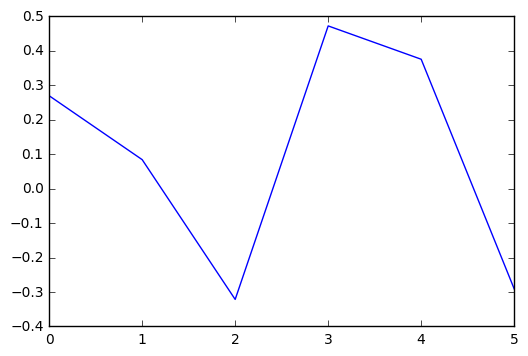

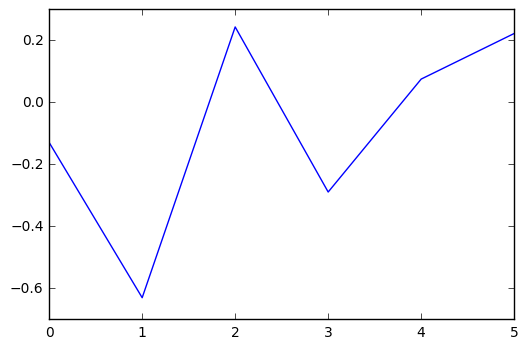

[0.124, 0.1223]


In [16]:
sax = SAX(n_bins= 3 , quantiles= 'empirical')
print(sax.get_params)
plt.plot(X[3])
plt.show()
plt.plot(X[1])
plt.show()
X_sax = sax.fit_transform(X_paa)
print(X_paa[3])
print(X_sax[3])
print(X_paa[1])
print(X_sax[1])
plt.plot(X_paa[3] )
plt.show()
plt.plot(X_paa[1])
plt.show()
# plt.hist(df_list[0])
# plt.show()
bins = norm.ppf(np.linspace(0 , 1 , 4)[1:-1])
bins = [0.124 , 0.1223]
print(bins)

   Price 
0      10
1       8
2      12
3      11
4      18
5      11
6       7
[[0.27272727]
 [0.09090909]
 [0.45454545]
 [0.36363636]
 [1.        ]
 [0.36363636]
 [0.        ]]
k Value is  1
[0.6280991735537189]
k Value is  2
[0.6280991735537189, 0.15564738292011016]
k Value is  3
[0.6280991735537189, 0.15564738292011016, 0.02066115702479336]
k Value is  4
[0.6280991735537189, 0.15564738292011016, 0.02066115702479336, 0.009641873278236908]
k Value is  5
[0.6280991735537189, 0.15564738292011016, 0.02066115702479336, 0.009641873278236908, 0.00413223140495868]


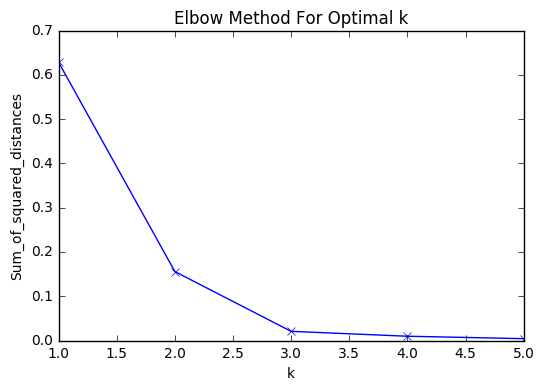

In [2]:
import pandas  as pd
import matplotlib.pyplot  as plt
from sklearn.preprocessing  import MinMaxScaler
from sklearn.cluster  import KMeans
data = pd.read_csv(r"D:\cloud_coe_work\esplus_timeseries\cluster.csv", encoding='utf-8')
print(data.head(10))
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)
data.describe()
print(data_transformed)
Sum_of_squared_distances = []
K = range(1,6)
for k in K:
    print("k Value is ",k)
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    print(Sum_of_squared_distances)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [46]:
import re
ts1 = ['a','b', 'b' ,'a', 'c', 'c' ,'a']
ts2 = ['b', 'a', 'c', 'a', 'b', 'c' , 'b' , 'a']
ts1_ngrams = []


def get_n_grams(ts1):
    for i in range(len(ts1) , 1 , -1):
    #     print(i)
        count= 0
        while(count+i <= len(ts1)):
            ts1_ngrams.append(ts1[count:count+i])
            count += 1
    return ts1_ngrams
# print("patterns in time series one ",get_n_grams(ts1))
ngrams = get_n_grams(ts1)

def find_pattern(patterns , times_series):
    ts2 = "".join(times_series)
    for pattern in patterns:
        pattern = "".join(pattern)
        a = [m.start() for m in re.finditer(pattern,ts2)]
        if a : 
            print(a)
            print("pattern found",pattern)

#call find pattern
find_pattern(ngrams , ts2)

[0]
pattern found bac
[3]
pattern found ab
[0, 6]
pattern found ba
[1]
pattern found ac
[2]
pattern found ca


In [15]:
import statistics as st
import numpy as np

def get_PAA(n_bins , data):
    part = 0
    partition = int(len(data) / n_bins)
    avg = []
    while(part+partition <= len(data)):
        print(data[part:part+partition])
        avg.append(st.median(data[part:part+partition]))
        part+= partition
    print("average " , avg)

get_PAA(2 , [1,2,2,3,3,4,6,7,3,6])

        

[1, 2, 2, 3, 3]
[4, 6, 7, 3, 6]
average  [2, 6]
